## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
m=pd.merge(mouse_metadata,study_results,on="Mouse ID")
m.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the DataFrame.
m['Mouse ID'].nunique()

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
m=m.sort_values(['Mouse ID', 'Timepoint'], ascending=[True, True])
duplicated_mice = m[m.duplicated(keep='first')]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
d=m.drop_duplicates(subset="Mouse ID",keep="last")
d.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [9]:
# Checking the number of mice in the clean DataFrame.
d["Mouse ID"].count()

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
mean = mean.rename(columns={"Tumor Volume (mm3)":"Mean"})

median = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
median = median.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

std = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
std = std.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})

sem = d[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
sem = sem.rename(columns={"Tumor Volume (mm3)":"SEM"})

m1 = pd.merge(mean,median,on="Drug Regimen")
m2 = pd.merge(variance,std,on="Drug Regimen")
m3 = pd.merge(m1,m2,on="Drug Regimen")

summary = pd.merge(m3,sem,on="Drug Regimen")
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

In [11]:
b=m[["Drug Regimen","Mouse ID"]].groupby("Drug Regimen").count()
b=b.sort_values("Mouse ID",ascending=False)
b

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


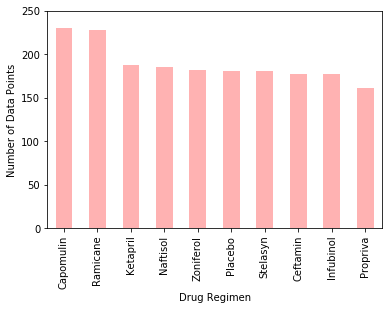

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
b.plot(kind="bar",legend=None,color='r',alpha=.3)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.ylim(0,250)
plt.show()

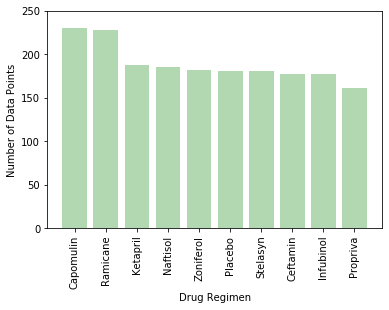

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x=list(b.index.values)
y=b["Mouse ID"]
plt.bar(x,y,color='g',alpha = 0.3, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.ylim(0,250)
plt.xticks(rotation=90)
plt.show()

## Pie Plots

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
s=mouse_metadata[["Sex","Mouse ID"]].groupby("Sex").count()
s=s.sort_values("Sex",ascending=False)
s=s.rename(columns={"Mouse ID":"Total Mice"})
s

,Total Mice
Sex,
Male,125
Female,124


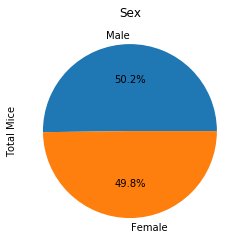

In [15]:
s.plot(kind="pie", figsize=(20,4),autopct='%1.1f%%',legend = False,subplots=True)

# Set a title for the chart
plt.title("Sex")

plt.show()


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

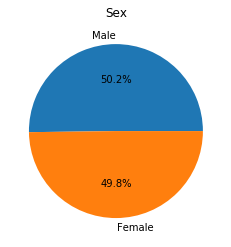

In [17]:
labels = list(s.index.values)
sex = s["Total Mice"]
explode = (0,0)
plt.title("Sex")
plt.pie(sex,explode=explode,labels=labels, autopct="%1.1f%%",shadow=False,startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
d.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1


In [19]:
Capomulin = d.loc[d["Drug Regimen"]=="Capomulin"]
Capomulin_tumor = Capomulin["Tumor Volume (mm3)"]

Ramicane = d.loc[d["Drug Regimen"]=="Ramicane"]
Ramicane_tumor = Ramicane["Tumor Volume (mm3)"]

Infubinol = d.loc[d["Drug Regimen"]=="Infubinol"]
Infubinol_tumor = Infubinol["Tumor Volume (mm3)"]

Ceftamin = d.loc[d["Drug Regimen"]=="Ceftamin"]
Ceftamin_tumor = Ceftamin["Tumor Volume (mm3)"]

In [20]:
dic = {"CAPOMULIN":Capomulin_tumor,"RAMICANE":Ramicane_tumor,
            "INFUBINOL":Infubinol_tumor,"CEFTAMIN":Ceftamin_tumor}

for key,value in dic.items():

    quartiles = value.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(key)
    
    print(f'- IQR is {iqr:.2f}.')
    print(f"- Values below {lower_bound:.2f} or above {upper_bound:.2f} could be outliers.")

    outliers=[]
    for y in value:
        if y < lower_bound or y > upper_bound:
            outliers.append(y)
    
    formatted_outliers = ["%.2f" % member for member in outliers]

    if len(outliers)>0: 
        print(f'- Outliers are {formatted_outliers}\n')
    else:
        print('- There are no outliers.\n')

CAPOMULIN
- IQR is 7.78.
- Values below 20.70 or above 51.83 could be outliers.
- There are no outliers.

RAMICANE
- IQR is 9.10.
- Values below 17.91 or above 54.31 could be outliers.
- There are no outliers.

INFUBINOL
- IQR is 11.48.
- Values below 36.83 or above 82.74 could be outliers.
- Outliers are ['36.32']

CEFTAMIN
- IQR is 15.58.
- Values below 25.36 or above 87.67 could be outliers.
- There are no outliers.



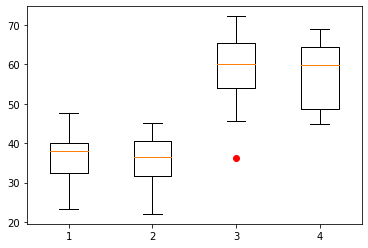

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor],sym='r')
plt.show()

## Line and Scatter Plots

In [22]:
c = d[d["Drug Regimen"]=="Capomulin"]
c.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2


In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
l = m.loc[m["Drug Regimen"]=="Capomulin"]
l.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [24]:
mouse_l509 = m.loc[m["Mouse ID"]=="l509"]
mouse_l509

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


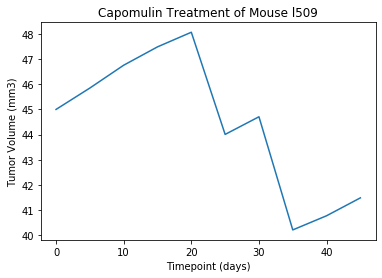

In [25]:
timepoint = mouse_l509["Timepoint"]
tumor_volume = mouse_l509["Tumor Volume (mm3)"]
plt.plot(timepoint, tumor_volume)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
        

In [26]:
r = m[m["Drug Regimen"]=="Capomulin"]
r.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [27]:
r=r.groupby("Mouse ID").mean()
r.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


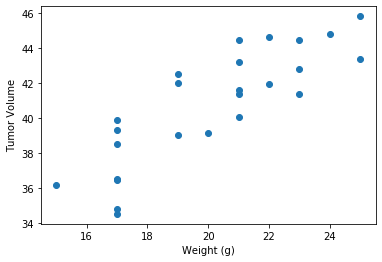

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = r.iloc[:,1]
average_tumor_volume = r.iloc[:,3]

plt.scatter(weight,average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,average_tumor_volume)

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


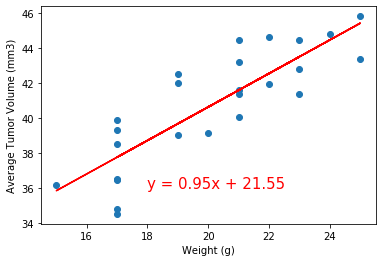

In [30]:
# Add the linear regression equation and line to plot

from scipy.stats import linregress

weight = r.iloc[:,1]
average_tumor_volume = r.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,average_tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()